In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import linregress
import seaborn as sns
from tqdm import tqdm   #progressbar
tqdm.pandas()
sns.set();

In [3]:
data = pd.read_excel("D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/Kortrijk/dataKortrijk5022019.xlsx")

In [16]:
dataBrugge = pd.read_excel("C:/Users/beheerder/dataBrugge26022019.xlsx")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32640 entries, 0 to 34572
Data columns (total 24 columns):
application            32640 non-null object
battery                32640 non-null int64
data_version           32640 non-null float64
endTime                32640 non-null datetime64[ns]
endTimeMillis          32640 non-null int64
id                     32640 non-null object
latitude               32640 non-null float64
longitude              32640 non-null float64
model                  32640 non-null object
notification           32640 non-null bool
session                32640 non-null int64
startTime              32640 non-null datetime64[ns]
startTimeMillis        32640 non-null int64
studyKey               32640 non-null object
surveyId               32640 non-null object
dag                    32640 non-null datetime64[ns]
uur                    32640 non-null int64
minuut                 32640 non-null int64
duur                   32640 non-null float64
day             

(1) wat zijn de langst gebruike applicaties: duur? 

In [8]:
# Top 10 langste (in s)
langsteApps = data.groupby(['application'])['duur']\
    .count() \
    .reset_index(name='duur') \
    .sort_values(by='duur', ascending=False)
langsteApps.reset_index()[:10]


,index,application,duur
0,166,com.snapchat.android,8489
1,40,com.android.systemui,5856
2,63,com.facebook.orca,2390
3,101,com.instagram.android,2184
4,62,com.facebook.katana,1554
5,80,com.google.android.youtube,1217
6,142,com.samsung.android.messaging,1203
7,34,com.android.mms,937
8,24,com.android.chrome,740
9,206,wp.wattpad,415


In [17]:
langsteApps = dataBrugge.groupby(['application'])['duur']\
    .count() \
    .reset_index(name='duur') \
    .sort_values(by='duur', ascending=False)
langsteApps.reset_index()[:10]

,index,application,duur
0,118,com.snapchat.android,2766
1,42,com.facebook.katana,1668
2,75,com.instagram.android,1424
3,31,com.android.systemui,1196
4,43,com.facebook.orca,1004
5,24,com.android.mediacenter,537
6,99,com.samsung.android.messaging,361
7,108,com.sec.android.app.sbrowser,281
8,60,com.google.android.youtube,260
9,4,be.smartschool.mobile,258


In [18]:
langsteApps["minuten"] = langsteApps["duur"]/60

In [19]:
langsteApps[:5]

,application,duur,minuten
118,com.snapchat.android,2766,46.100000
42,com.facebook.katana,1668,27.800000
75,com.instagram.android,1424,23.733333
31,com.android.systemui,1196,19.933333
43,com.facebook.orca,1004,16.733333


In [ ]:
Piekgebruik

In [ ]:
aantal appevents per uur? 

In [20]:
alg_u = dataBrugge["uur"].value_counts().to_frame()
alg_u = alg_u.reset_index()
alg_u.columns = ["uur", "appevents"]
alg_u

,uur,appevents
0,21,1319
1,17,1155
2,18,1110
3,16,1090
4,20,1075
5,19,1043
6,12,1021
7,22,880
8,13,827
9,15,636


In [21]:
alg_u = alg_u.sort_values(by=['uur'])

In [22]:
alg_u

,uur,appevents
18,0,139
19,1,62
20,2,56
22,3,27
23,4,19
21,5,45
14,6,293
10,7,618
15,8,238
17,9,167


In [ ]:
Piekgebruik tijdens week 1 

In [24]:
def lesweek(row):
    if row["day"] == 14:
        return "lesweek 1"
    if row["day"] == 15:
        return "lesweek 1"
    if row["day"] == 16:
        return "lesweek 1"
    if row["day"] == 17:
        return "lesweek 1"
    if row["day"] == 18:
        return "lesweek 1"
    if row["day"] == 19:
        return "lesweek 1"
    if row["day"] == 20:
        return "lesweek 1"
    if row["day"] == 21:
        return "lesweek 2"
    if row["day"] == 22:
        return "lesweek 2"
    if row["day"] == 23:
        return "lesweek 2"
    if row["day"] == 24:
        return "lesweek 2"
    if row["day"] == 25:
        return "lesweek 2"
    if row["day"] == 26:
        return "lesweek 2"
    if row["day"] == 27:
        return "lesweek 2"
    if row["day"] == 28:
        return "lesweek 3"
    if row["day"] == 29:
        return "lesweek 3"
    if row["day"] == 30:
        return "lesweek 3"

In [25]:
def lesweek(row):
    if row["day"] == 23:
        return "lesweek 1"
    if row["day"] == 24:
        return "lesweek 1"
    if row["day"] == 25:
        return "lesweek 1"
    if row["day"] == 26:
        return "lesweek 1"
    if row["day"] == 27:
        return "lesweek 1"
    if row["day"] == 28:
        return "lesweek 1"
    if row["day"] == 29:
        return "lesweek 1"
    if row["day"] == 30:
        return "lesweek 1"
    if row["day"] == 31:
        return "lesweek 2"
    if row["day"] == 1:
        return "lesweek 2"
    if row["day"] == 2:
        return "lesweek 2"
    if row["day"] == 3:
        return "lesweek 2"
    if row["day"] == 4:
        return "lesweek 2"
    if row["day"] == 5:
        return "lesweek 2"
    if row["day"] == 6:
        return "lesweek 2"
    if row["day"] == 7:
        return "lesweek 3"
    if row["day"] == 8:
        return "lesweek 3"
    if row["day"] == 9:
        return "lesweek 3"
    if row["day"] == 10:
        return "lesweek 3"

In [26]:
dataBrugge["beleid"] = dataBrugge.apply(lesweek, axis=1)

In [26]:
week1 = data[data["beleid"] ==  "lesweek 1"]

In [24]:
dataBrugge

,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,...,studyKey,surveyId,dag,uur,minuut,duur,day,naam_dag,moment,dagverloop
0,com.android.systemui,29,1.5,2019-01-23 19:07:26.649,1548266846649,00805caf-ff20-4bfb-964f-8bc01b035569,51.198560,3.240879,SM-A600FN,False,...,_,_,2019-01-23,19,7,2.427,23,Wednesday,WEEK,na
1,com.android.chrome,26,1.5,2019-01-23 19:14:53.040,1548267293040,00805caf-ff20-4bfb-964f-8bc01b035569,51.198560,3.240879,SM-A600FN,False,...,_,_,2019-01-23,19,14,15.794,23,Wednesday,WEEK,na
2,com.facebook.orca,89,1.5,2019-01-23 14:44:38.098,1548251078098,00805caf-ff20-4bfb-964f-8bc01b035569,51.215329,3.249471,SM-A600FN,False,...,_,_,2019-01-23,14,43,40.475,23,Wednesday,WEEK,na
3,com.sec.android.app.sbrowser,89,1.5,2019-01-23 14:45:20.986,1548251120986,00805caf-ff20-4bfb-964f-8bc01b035569,51.215329,3.249471,SM-A600FN,False,...,_,_,2019-01-23,14,45,0.018,23,Wednesday,WEEK,na
4,com.sec.android.app.sbrowser,89,1.5,2019-01-23 14:45:22.545,1548251122545,00805caf-ff20-4bfb-964f-8bc01b035569,51.215329,3.249471,SM-A600FN,False,...,_,_,2019-01-23,14,45,1.490,23,Wednesday,WEEK,na
5,com.facebook.katana,86,1.5,2019-01-23 14:47:21.135,1548251241135,00805caf-ff20-4bfb-964f-8bc01b035569,51.215593,3.248963,SM-A600FN,False,...,_,_,2019-01-23,14,46,70.133,23,Wednesday,WEEK,na
6,com.facebook.katana,86,1.5,2019-01-23 14:47:29.613,1548251249613,00805caf-ff20-4bfb-964f-8bc01b035569,51.215593,3.248963,SM-A600FN,False,...,_,_,2019-01-23,14,47,5.511,23,Wednesday,WEEK,na
7,com.android.chrome,86,1.5,2019-01-23 14:48:06.998,1548251286998,00805caf-ff20-4bfb-964f-8bc01b035569,51.215593,3.248963,SM-A600FN,False,...,_,_,2019-01-23,14,47,13.951,23,Wednesday,WEEK,na
8,com.android.systemui,86,1.5,2019-01-23 14:48:13.544,1548251293544,00805caf-ff20-4bfb-964f-8bc01b035569,51.215593,3.248963,SM-A600FN,False,...,_,_,2019-01-23,14,48,0.421,23,Wednesday,WEEK,na
9,com.android.systemui,86,1.5,2019-01-23 14:49:28.543,1548251368543,00805caf-ff20-4bfb-964f-8bc01b035569,51.215593,3.248963,SM-A600FN,False,...,_,_,2019-01-23,14,49,1.369,23,Wednesday,WEEK,na


In [27]:
week1_Br = dataBrugge[dataBrugge["beleid"] == "lesweek 1"]

In [29]:
week2_Br = dataBrugge[dataBrugge["beleid"] == "lesweek 2"]

In [40]:
week1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13125 entries, 0 to 34572
Data columns (total 25 columns):
application            13125 non-null object
battery                13125 non-null int64
data_version           13125 non-null float64
endTime                13125 non-null datetime64[ns]
endTimeMillis          13125 non-null int64
id                     13125 non-null object
latitude               13125 non-null float64
longitude              13125 non-null float64
model                  13125 non-null object
notification           13125 non-null bool
session                13125 non-null int64
startTime              13125 non-null datetime64[ns]
startTimeMillis        13125 non-null int64
studyKey               13125 non-null object
surveyId               13125 non-null object
dag                    13125 non-null datetime64[ns]
uur                    13125 non-null int64
minuut                 13125 non-null int64
duur                   13125 non-null float64
day             

In [30]:
days_arr = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [35]:
week1_heat = week2_Br.groupby(["uur", "naam_dag"])["application"].size().reset_index()

In [36]:
week1_heat2 = week1_heat.pivot("uur", "naam_dag", "application")

In [37]:
week1_heat2 = week1_heat2.reindex(days_arr, axis=1)

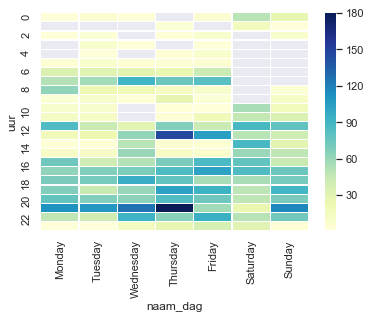

In [38]:
sns.heatmap(week1_heat2, cmap="YlGnBu", linewidths=.1)

In [12]:
week1_heat = dataBrugge.groupby(["uur", "naam_dag"])["application"].size().reset_index()

In [13]:
week1_heat2 = week1_heat.pivot("uur", "naam_dag", "application")

In [14]:
week1_heat2 = week1_heat2.reindex(days_arr, axis=1)

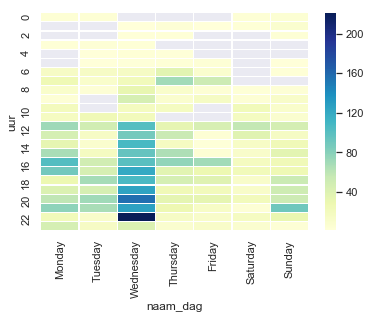

In [15]:
sns.heatmap(week1_heat2, cmap="YlGnBu", linewidths=.1)

In [56]:
week2_heat = week2.groupby(["uur", "naam_dag"])["application"].size().reset_index()

In [57]:
week2_heat2 = week2_heat.pivot("uur", "naam_dag", "application")

In [58]:
week2_heat2 = week2_heat2.reindex(days_arr, axis=1)

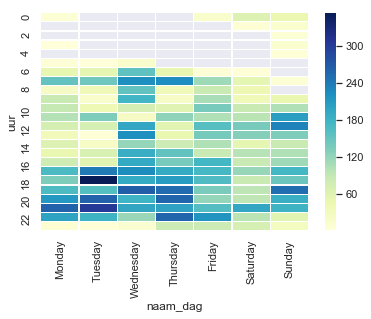

In [59]:
sns.heatmap(week2_heat2, cmap="YlGnBu", linewidths=.1)

heatmap per week: per moment per dag. 

In [61]:
week1_heat = week1.groupby(["dagverloop", "naam_dag"])["application"].size().reset_index()
week1_heat2 = week1_heat.pivot("dagverloop", "naam_dag", "application")
week1_heat2 = week1_heat.pivot("dagverloop", "naam_dag", "application")

In [62]:
days_arr = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [63]:
week1_heat2 = week1_heat2.reindex(days_arr, axis=1)

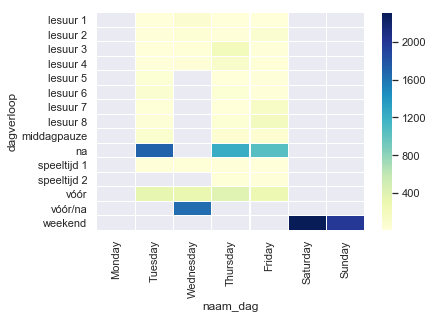

In [64]:
sns.heatmap(week1_heat2, cmap="YlGnBu", linewidths=.1)

In [65]:
week2_heat = week2.groupby(["dagverloop", "naam_dag"])["application"].size().reset_index()
week2_heat2 = week2_heat.pivot("dagverloop", "naam_dag", "application")
week2_heat2 = week2_heat.pivot("dagverloop", "naam_dag", "application")

In [66]:
week2_heat2 = week2_heat2.reindex(days_arr, axis=1)

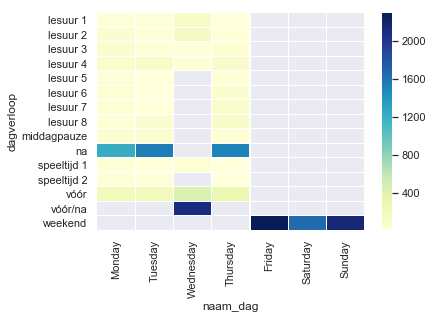

In [67]:
sns.heatmap(week2_heat2, cmap="YlGnBu", linewidths=.1)